<a href="https://colab.research.google.com/github/SNVibbi/AiSaturdayLagos-ML-Flipped-Cohort/blob/main/Global_Student_Migration_Analysis_Project_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Student Migration Analysis Project: Comprehensive EDA

---
This project explores trends in global student migration, actionable  insights for students, universities, policymakers using Python. It includes:



*   Dataset Overview & Initial Exploration (dataset-overview)
*   Data Quality Assessment {#data-quality}
*   Data quality visualizations
*   Geographic visualization
*   Enrollment and graduation trends
*   Language test insights
*   Salary analysis for placed students


  Dataset: Global Student Migration & Higher Education Trends (2019-2023)
  Size: 5,000 international students
  Scope: Comprehensive analaysis of migration patterns, accademiv outcomes, placement success, salary analysis for placed students and education consultants in global higher education ecosystem.









In [2]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Color palettes for consistent theming
colors = ["#FF7A85", "#3FD0C0",  "#5AB3E6",  "#A6D7BD", "#FFE6A3", "#D3A5E5", "#9FE0D0",  "#F4DF7B"]
custom_cmap = sns.color_palette(colors)


# Data Overview & Initial Exploration (dataset-overview)

In [3]:
#Load and perform initial exploration
df = pd.read_csv('/content/global_student_migration.csv')

print (" DATASET OVERVIEW")
print ("="*60)
print (f"Dataset Shape: {df.shape[0]:,} row x {df.shape[1]} columns")
print (f" Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print (f" Duplicate Records: {df.duplicated().sum()}")
print (f" Data Collection Period: {df['year_of_enrollment'].min()} - {df['graduation_year'].max()}")


 DATASET OVERVIEW
Dataset Shape: 5,000 row x 20 columns
 Memory Usage: 4.19 MB
 Duplicate Records: 0
 Data Collection Period: 2019 - 2026


In [4]:
# Display first few rows with enhanced formatting
print(f"\n First 5 ROWS PREVIEW")
print("="*60)
display(df.head())



 First 5 ROWS PREVIEW


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [5]:
# Dataset structure overview
print(f"\n DATASET STRUCTURE")
print("="*60)
print(f"Categorical features: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Numerical features: {len(df.select_dtypes(include=['int64,' 'float64']).columns)}")
print(f"Features Categories:")
print(f" Geographic: origin_country, distination_country, distination_city, placement_country")
print(f" Academic: field_of_study, course_name, gpa_or_score, test_score, language_proficiency_test")
print(f" Institutional: university_name, placement_company")
print(f" Financial: scholarship_recieved, starting_salary_usd")
print(f" Administrative: visa_status, post_graduation_visa")
print(f" Temporal: year_of_enrollment, graduation_year")
print(f" Outcome: placement_staus")



 DATASET STRUCTURE
Categorical features: 15
Numerical features: 0
Features Categories:
 Geographic: origin_country, distination_country, distination_city, placement_country
 Academic: field_of_study, course_name, gpa_or_score, test_score, language_proficiency_test
 Institutional: university_name, placement_company
 Financial: scholarship_recieved, starting_salary_usd
 Administrative: visa_status, post_graduation_visa
 Temporal: year_of_enrollment, graduation_year
 Outcome: placement_staus


# Data Quality Assessment {#data-quality}

In [6]:
# Comprehensive data quality assessment
print (" COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("="*60)

# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count' : df.isnull().sum(),
    'Missing_Percentage' : (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type' : df.dtypes,
    'Unique_Values' : [df[col].nunique() for col in df.columns]
})
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

print(" Missing VALUES ANALYSIS")
print("_"*40)
display(missing_data)


 COMPREHENSIVE DATA QUALITY ASSESSMENT
 Missing VALUES ANALYSIS
________________________________________


,Column,Missing_Count,Missing_Percentage,Data_Type,Unique_Values
placement_country,placement_country,2491,49.82,object,10
placement_company,placement_company,2491,49.82,object,13
language_proficiency_test,language_proficiency_test,982,19.64,object,4
student_id,student_id,0,0.00,object,5000
destination_city,destination_city,0,0.00,object,51
destination_country,destination_country,0,0.00,object,10
origin_country,origin_country,0,0.00,object,10
university_name,university_name,0,0.00,object,74
scholarship_received,scholarship_received,0,0.00,object,2
course_name,course_name,0,0.00,object,15


In [7]:
# Comprehensive data quality assessment
print (" COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("="*60)

# Statisticl summary for numerical features
print (f"\n NUMERICAL FEATURES STATISTICAL SUMMARY")
print("_" *40)
numerical_cols = df.select_dtypes(include=[np.number]).columns
display(df[numerical_cols].describe())


 COMPREHENSIVE DATA QUALITY ASSESSMENT

 NUMERICAL FEATURES STATISTICAL SUMMARY
________________________________________


,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [8]:
# Comprehensive data quality assessment
print (" COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("="*60)

# Categorical features analysis
print(f"\n CATEGORICAL FEATURES ANALYSIS")
print("_"*40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  unique_count = df[col].nunique()
  print(f"{col:<30}: {unique_count:>4} unique values")
  if unique_count <= 10:
    print(f" Values: {list(df[col].unique())}")
  print()


 COMPREHENSIVE DATA QUALITY ASSESSMENT

 CATEGORICAL FEATURES ANALYSIS
________________________________________
student_id                    : 5000 unique values

origin_country                :   10 unique values
 Values: ['Finland', 'UK', 'Ireland', 'UAE', 'South Africa', 'India', 'Germany', 'Russia', 'Canada', 'USA']

destination_country           :   10 unique values
 Values: ['Russia', 'Germany', 'Canada', 'UK', 'South Africa', 'India', 'UAE', 'USA', 'Finland', 'Ireland']

destination_city              :   51 unique values

university_name               :   74 unique values

course_name                   :   15 unique values

field_of_study                :    8 unique values
 Values: ['Engineering', 'Law', 'Arts', 'Social Sciences', 'Business', 'Computer Science', 'Medicine', 'Natural Sciences']

scholarship_received          :    2 unique values
 Values: ['No', 'Yes']

enrollment_reason             :    5 unique values
 Values: ['Higher Ranking', 'Job Opportunities', 'Scholarsh

In [9]:
# Comprehensive data quality assessment
print (" COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("="*60)

# Data quality insights
print(f" DATA QUALITY INSIGHTS")
print("_" * 40)
print(f" No duplicate records found")
print(f" Missing data patterns:")
print(f" -placement_country & placement_company: {missing_data.loc[missing_data['Column']== 'placement_country', 'Missing_Percentage'].values[0]:.1f}% (expected for non-placed student)")
print(f" -langugae_proficiency_test: {missing_data.loc[missing_data['Column']== 'language_proficiency_test', 'Missing_Percentage'].values[0]:.1f}% (expected for non-placed student)")
print(f" All other features have complete data")
print(f" Reasonable data types for all feautures")
print(f" High cardinality feautures: university_name, course_name, distination_city")


 COMPREHENSIVE DATA QUALITY ASSESSMENT
 DATA QUALITY INSIGHTS
________________________________________
 No duplicate records found
 Missing data patterns:
 -placement_country & placement_company: 49.8% (expected for non-placed student)
 -langugae_proficiency_test: 19.6% (expected for non-placed student)
 All other features have complete data
 Reasonable data types for all feautures
 High cardinality feautures: university_name, course_name, distination_city


# Data quality visualizations

MISSING VALUE HEATMAP

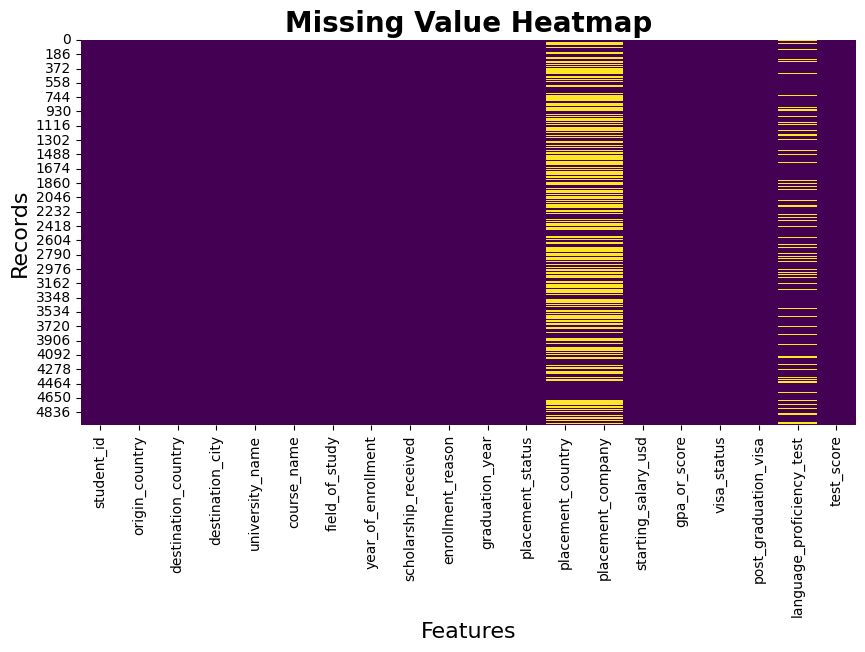

In [10]:
# Data quality vistualizations
plt.figure(figsize=(10,5))

# Missing value heatmap
missing_matrix = df.isnull()
sns.heatmap(missing_matrix, cmap='viridis', cbar=False)
plt.title('Missing Value Heatmap', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Records', fontsize=16)
plt.show()


### DATA TYPES DISTRIBUTION

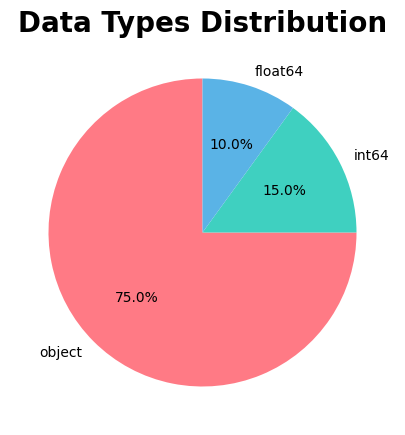

In [11]:
# 2 Data types distribution
dtype_count = df.dtypes.value_counts()
plt.figure(figsize=(10,5))
plt.pie(dtype_count, labels=dtype_count.index, autopct='%1.1f%%', startangle=90, colors=custom_cmap)
plt.title('Data Types Distribution', fontsize=20, fontweight='bold')
plt.show()


UNIQE VALUES DISTRIBUTION

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

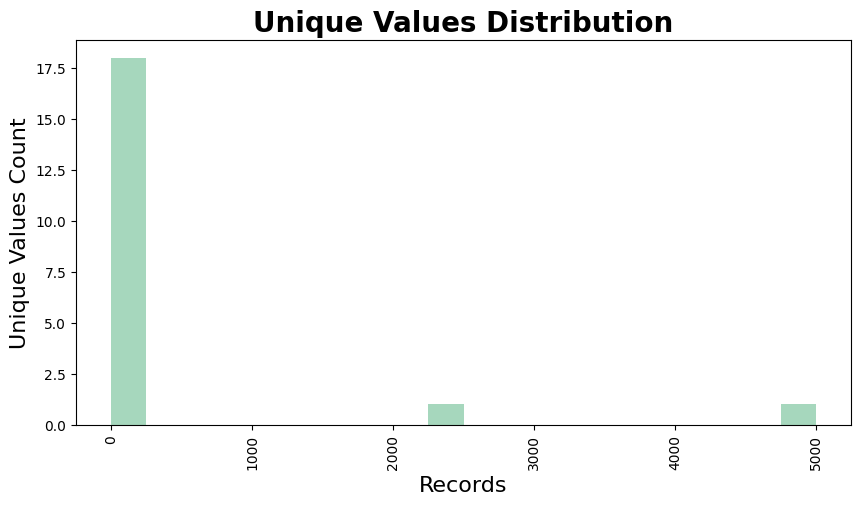

In [12]:
# Unique values distribution
unique_counts = [df[col].nunique() for col in df.columns]
plt.figure(figsize=(10,5))
plt.hist(unique_counts, bins=20, color=custom_cmap[3])
plt.title('Unique Values Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Records', fontsize=16)
plt.ylabel('Unique Values Count', fontsize=16)
plt.xticks(rotation=90)


### MISSING VALUES BY PERCENTAGE

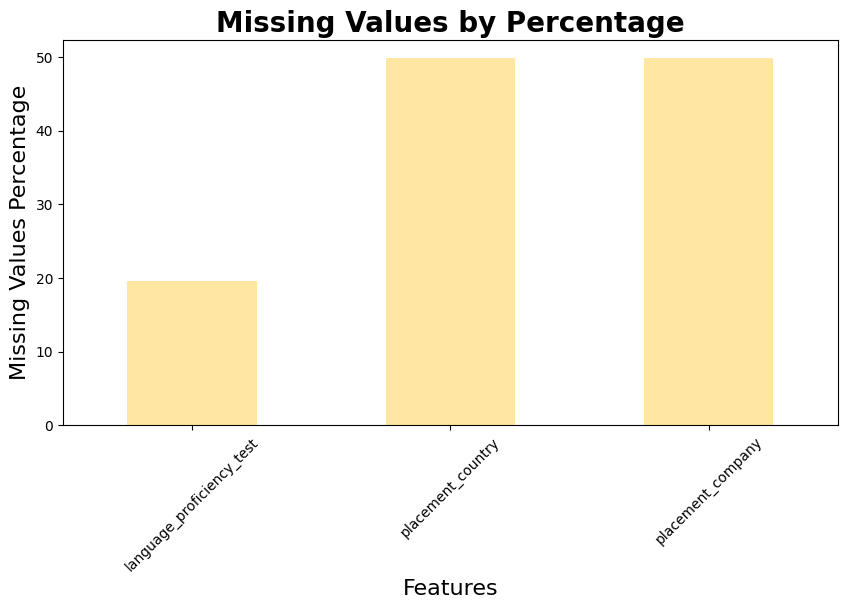

,0
language_proficiency_test,19.64
placement_country,49.82
placement_company,49.82


<Figure size 1000x500 with 0 Axes>

In [13]:
missing_pct = (df.isnull().sum() / len(df) * 100 ).sort_values(ascending=True)
missing_pct = missing_pct[missing_pct > 0]
if len(missing_pct) > 0:
  plt.figure(figsize=(10,5))
  missing_pct.plot(kind='bar', color=custom_cmap[4])
  plt.title('Missing Values by Percentage', fontsize=20, fontweight='bold')
  plt.xlabel('Features', fontsize=16)
  plt.ylabel('Missing Values Percentage', fontsize=16)
  plt.xticks(rotation=45)
  plt.show()
else:
  print("No missing values found")


plt.figure(figsize=(10,5))
missing_pct


# Geographic Migration Patterns

TOP DESTINATION COUNTRIES ANALYSIS

In [14]:
# Comprehensive geographic analysis
print (" COMPREHENSIVE GEOGRAPHIC ANALYSIS")
print("="*60)

# Top destination countries analysis
print (f"\n TOP DESTINATION COUNTRIES ANALYSIS")
print("_"*40)
distination_analysis = df['destination_country'].value_counts().head(15)
print (distination_analysis)


 COMPREHENSIVE GEOGRAPHIC ANALYSIS

 TOP DESTINATION COUNTRIES ANALYSIS
________________________________________
destination_country
UAE             538
UK              526
Germany         518
Russia          515
South Africa    496
India           493
USA             485
Canada          483
Finland         474
Ireland         472
Name: count, dtype: int64


ORIGIN COUNTRIES ANALYSIS

In [15]:
# Comprehensive geographic analysis
print (" COMPREHENSIVE GEOGRAPHIC ANALYSIS")
print("="*60)

# Origin countries analysis
print (f"\n ORIGIN COUNTRIES ANALYSIS")
print("_"*40)
origin_analysis = df['origin_country'].value_counts().head(15)
print (origin_analysis)


 COMPREHENSIVE GEOGRAPHIC ANALYSIS

 ORIGIN COUNTRIES ANALYSIS
________________________________________
origin_country
Russia          532
Germany         531
Canada          517
Ireland         510
USA             504
UK              499
India           498
South Africa    493
Finland         465
UAE             451
Name: count, dtype: int64


MIGRATION FLOW ANALYSIS

In [16]:
# Comprehensive geographic analysis
print (" COMPREHENSIVE GEOGRAPHIC ANALYSIS")
print("="*60)

# Migration flow analysis
print(f"\n MIGRATION FLOW ANALYSIS")
print("_"*40)
migration_flow = df.groupby(['origin_country', 'destination_country']).size().reset_index(name='student_count')
top_flows = migration_flow.nlargest(15, 'student_count')
print("Top 15 Migration Corridors:")
for _, row in top_flows.iterrows():
  print(f"{row['origin_country']} -> {row['destination_country']}: {row['student_count']} students")



 COMPREHENSIVE GEOGRAPHIC ANALYSIS

 MIGRATION FLOW ANALYSIS
________________________________________
Top 15 Migration Corridors:
Germany -> UAE: 72 students
India -> UK: 72 students
Russia -> UAE: 71 students
USA -> Ireland: 69 students
Canada -> Russia: 68 students
Canada -> Germany: 67 students
Germany -> Russia: 67 students
Russia -> Germany: 67 students
Russia -> Ireland: 66 students
UK -> UAE: 66 students
Ireland -> India: 65 students
Russia -> UK: 65 students
Germany -> India: 63 students
Ireland -> South Africa: 63 students
Ireland -> UK: 63 students


REGIONAL ANALYSIS

In [17]:
# Comprehensive geographic analysis
print (" COMPREHENSIVE GEOGRAPHIC ANALYSIS")
print("="*60)

# Regional analysis
print(f"\n REGIONAL ANALYSIS")
print("_"*40)

# Define regional groupings (simplified)
region_mapping = {
    'Asia': ['India', 'China', 'South Korea', 'Japan', 'Singapore', 'UAE', 'Saudi Arabia'],
    'Eroupe' : ['UK','Germany', 'France', 'Netherlands', 'Ireland', 'Finland', 'Russia'],
    ' North America' : ['USA', 'Canada'],
    'Oceania' : ['Australia'],
    'Africa' : ['South Africa', 'Nigeria'],
    'South America' : ['Brazil', 'Argentina']
}

def get_region(country):
  for region, countries in region_mapping.items():
    if country in countries:
      return region
  return 'Other'


df['region_region'] = df['origin_country'].apply(get_region)
df['destination_region'] = df['destination_country'].apply(get_region)


print ('Regional Distribution:')
print ('Origin Regions:')
print (df['region_region'].value_counts())
print ('\nDestination Regions:')
print (df['destination_region'].value_counts())


 COMPREHENSIVE GEOGRAPHIC ANALYSIS

 REGIONAL ANALYSIS
________________________________________
Regional Distribution:
Origin Regions:
region_region
Eroupe            2537
 North America    1021
Asia               949
Africa             493
Name: count, dtype: int64

Destination Regions:
destination_region
Eroupe            2505
Asia              1031
 North America     968
Africa             496
Name: count, dtype: int64


# Geographic Visualizations

TOP DESTINATION

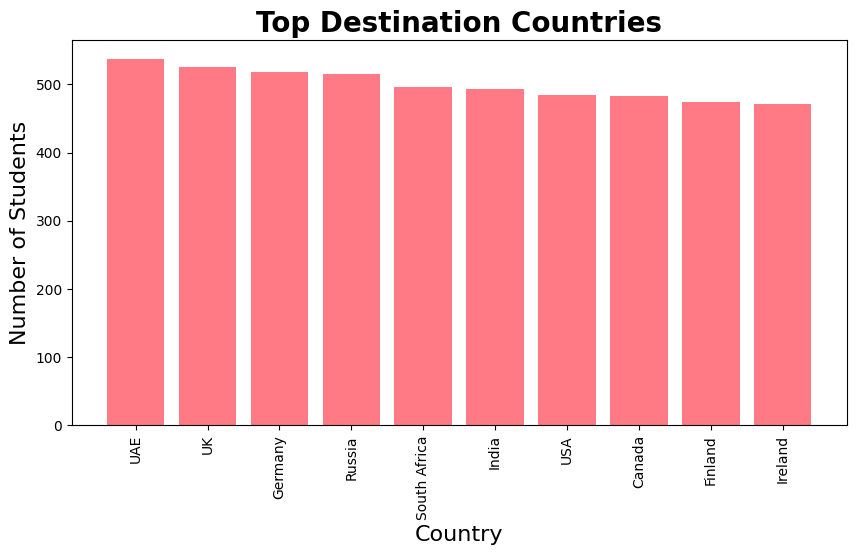

In [18]:
# Top destination

plt.figure(figsize=(10,5))
plt.bar(distination_analysis.index, distination_analysis.values, color=custom_cmap[0])
plt.title('Top Destination Countries', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)
plt.xticks(rotation=90)
plt.show()


TOP ORIGIN COUNTRIES

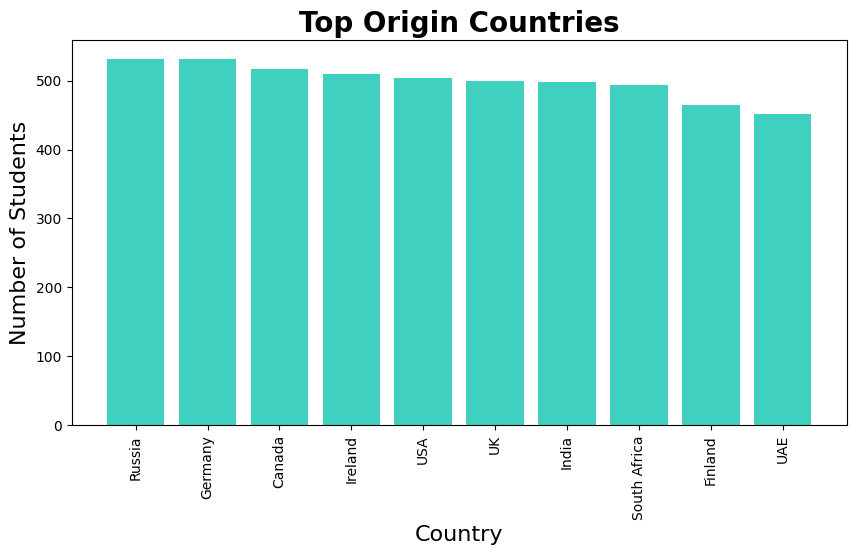

In [19]:
# Top origin countries

plt.figure(figsize=(10,5))
plt.bar(origin_analysis.index, origin_analysis.values, color=custom_cmap[1])
plt.title('Top Origin Countries', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)
plt.xticks(rotation=90)
plt.show()


REGIONAL FLOWS

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Eroupe -> Eroupe'),
  Text(1, 0, 'Eroupe -> Asia'),
  Text(2, 0, ' North America -> Eroupe'),
  Text(3, 0, 'Eroupe ->  North America'),
  Text(4, 0, 'Asia -> Eroupe'),
  Text(5, 0, 'Africa -> Eroupe'),
  Text(6, 0, 'Eroupe -> Africa'),
  Text(7, 0, ' North America -> Asia'),
  Text(8, 0, 'Asia ->  North America'),
  Text(9, 0, ' North America ->  North America'),
  Text(10, 0, ' North America -> Africa'),
  Text(11, 0, 'Africa -> Asia'),
  Text(12, 0, 'Asia -> Africa'),
  Text(13, 0, 'Asia -> Asia'),
  Text(14, 0, 'Africa ->  North America')])

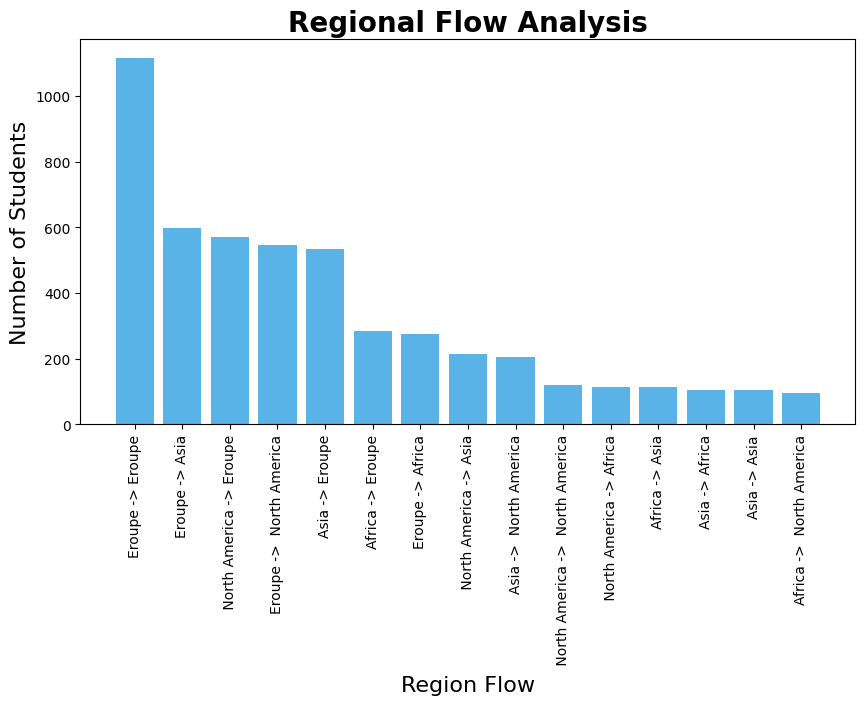

In [20]:
# Regional Flow

plt.figure(figsize=(10,5))
regional_flows = df.groupby(['region_region', 'destination_region']).size().reset_index(name='student_count')
regional_flows = regional_flows.nlargest(15, 'student_count')
regional_label = [f"{row['region_region']} -> {row['destination_region']}" for _, row in regional_flows.iterrows()]
plt.bar(regional_label, regional_flows['student_count'], color=custom_cmap[2])
plt.title('Regional Flow Analysis', fontsize=20, fontweight='bold')
plt.xlabel('Region Flow', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)
plt.xticks(rotation=90)


TOP DESTINATION CITIES

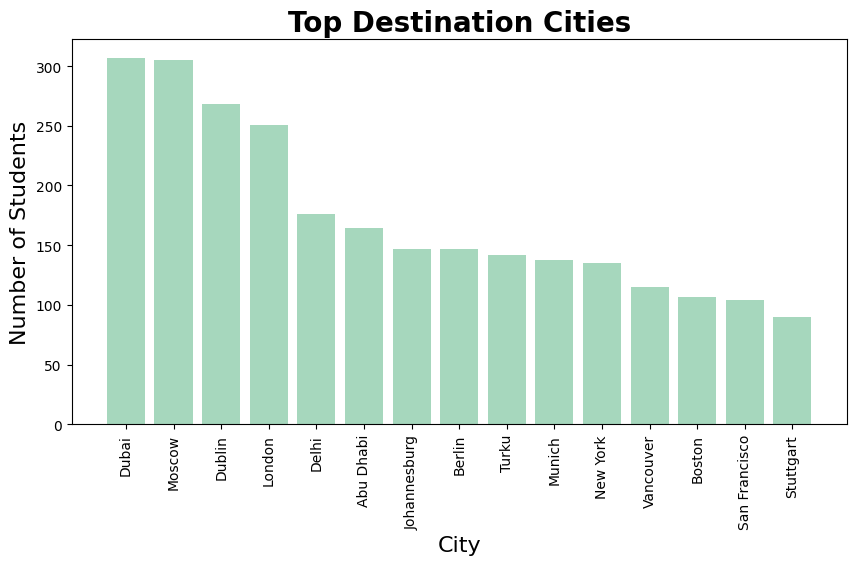

In [21]:
# Top destination cities

plt.figure(figsize=(10,5))
city_analysis = df['destination_city'].value_counts().head(15)
plt.bar(city_analysis.index, city_analysis.values, color=custom_cmap[3])
plt.title('Top Destination Cities', fontsize=20, fontweight='bold')
plt.xlabel('City', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)
plt.xticks(rotation=90)
plt.show()


# GEOGRAPHIC INSIGHT USING MATPLOTLIB

MIGRATION FLOW NETWORK-STYLE VISUALIZATION

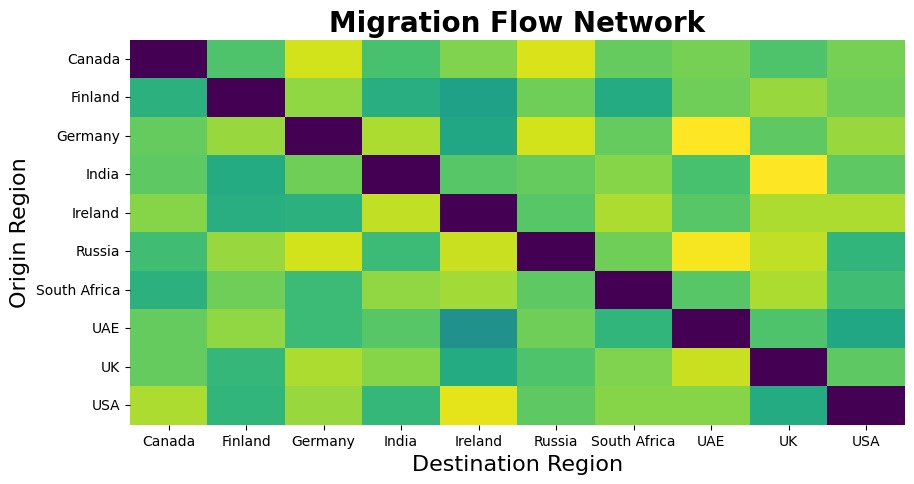

In [22]:
# Migration flow network-style visualization

plt.figure(figsize=(10,5))

migration_matrix = pd.crosstab(df['origin_country'], df['destination_country'])
sns.heatmap(migration_matrix, cmap='viridis', cbar=False)
plt.title('Migration Flow Network', fontsize=20, fontweight='bold')
plt.xlabel('Destination Region', fontsize=16)
plt.ylabel('Origin Region', fontsize=16)
plt.show()


COUNTRY DIVERSITY ANALYSIS

<Figure size 1000x500 with 0 Axes>

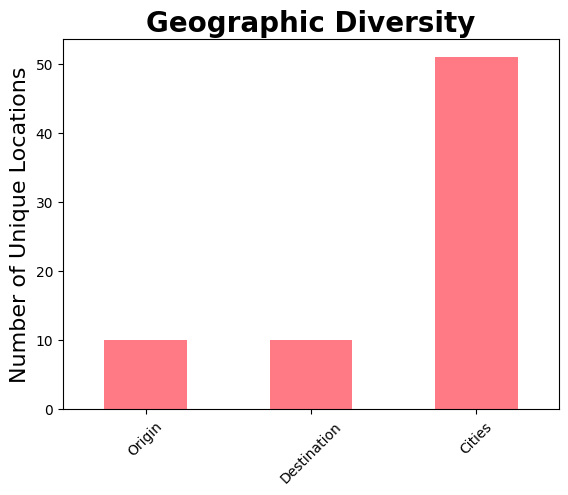

In [23]:
# Country diversity analysis

plt.figure(figsize=(10,5))

country_counts = pd.DataFrame({
    'Origin' : [df['origin_country'].nunique()],
    'Destination' : [df['destination_country'].nunique()],
    'Cities' : [df['destination_city'].nunique()]
})

country_counts.T.plot(kind='bar', color=custom_cmap[0])
plt.title('Geographic Diversity', fontsize=20, fontweight='bold')
plt.ylabel('Number of Unique Locations', fontsize=16)
plt.xticks(rotation=45)
plt.legend().remove()
plt.show()


TOP MIGRATION CORRIDORS

Text(0.5, 0, 'Number of Students')

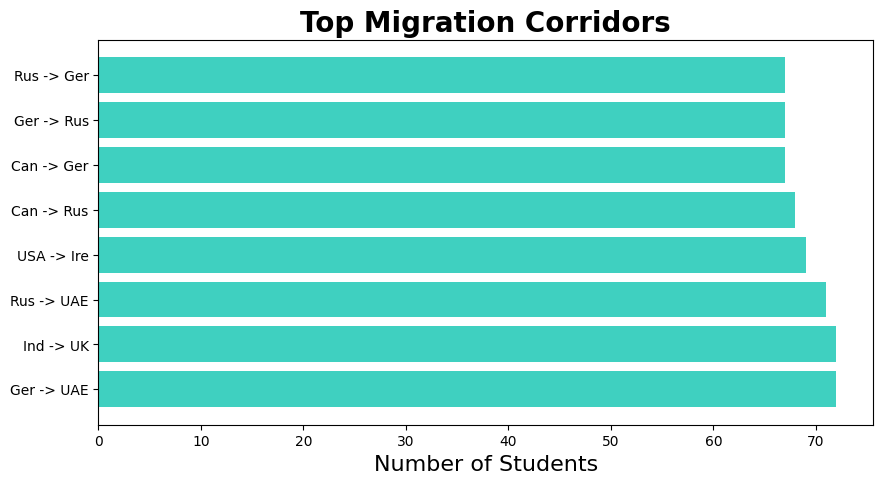

In [24]:
# Top migration corridors

plt.figure(figsize=(10,5))

top_corridors = top_flows.head(8)
corridor_labels = [f"{row['origin_country'][:3]} -> {row['destination_country'][:3]}" for _, row in top_corridors.iterrows()]
plt.barh(corridor_labels, top_corridors['student_count'], color=custom_cmap[1])
plt.title('Top Migration Corridors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Students', fontsize=16)


PLACEMENT SUCCESS BY DESTINATION

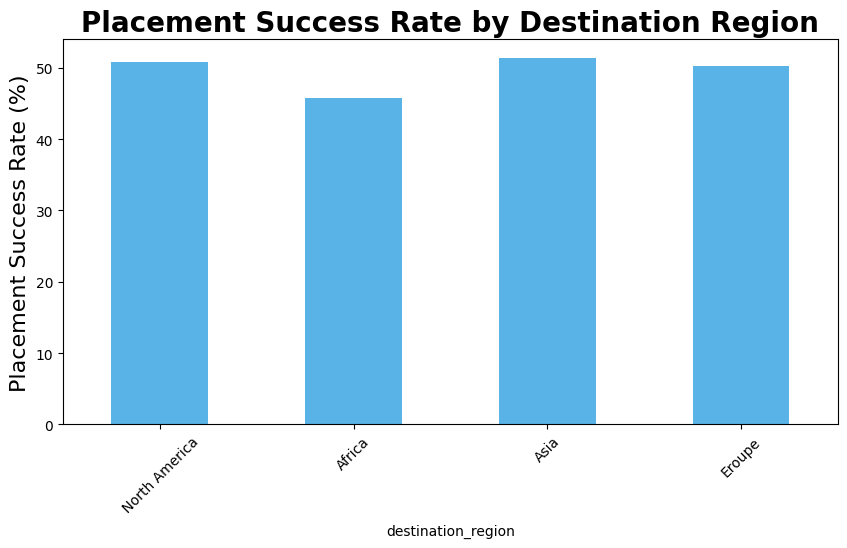

In [25]:
# Placement success by destination

plt.figure(figsize=(10,5))

placement_by_region = df.groupby('destination_region')['placement_status'].apply(lambda x: (x == 'Placed').mean() * 100)
placement_by_region.plot(kind='bar', color=custom_cmap[2])
plt.title('Placement Success Rate by Destination Region', fontsize=20, fontweight='bold')
plt.ylabel('Placement Success Rate (%)', fontsize=16)
plt.xticks(rotation=45)
plt.show()


# Enrollment and graduation trends

YEARLY ENROLLMENT OF STUDENTS

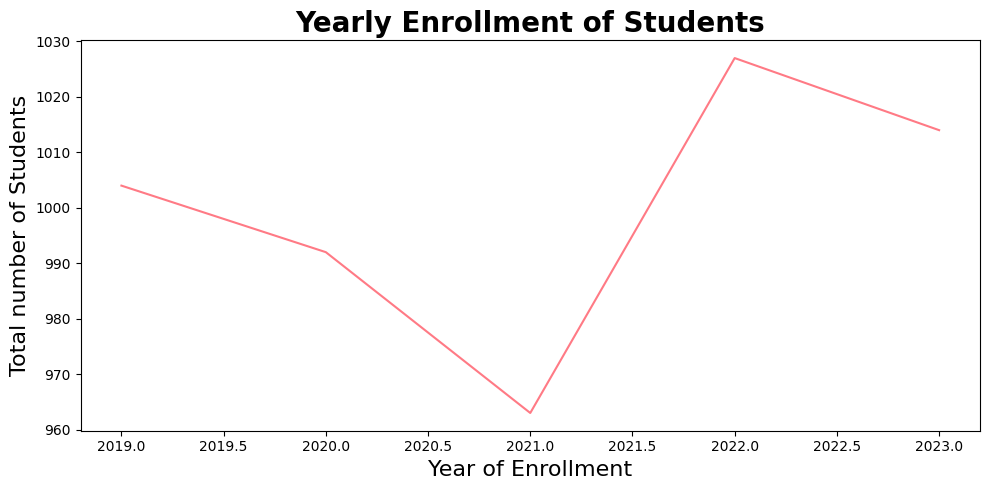

In [26]:
# Yearly Enrollment of students

enrollment_by_year = df['year_of_enrollment'].value_counts().sort_index()
enrollment_by_year
plt.figure(figsize=(10,5))

sns.lineplot(x=enrollment_by_year.index.get_level_values(0), y=enrollment_by_year.values, color=custom_cmap[0])
plt.title('Yearly Enrollment of Students', fontsize=20, fontweight='bold')
plt.xlabel('Year of Enrollment', fontsize=16)
plt.ylabel('Total number of Students', fontsize=16)
plt.tight_layout()
plt.show()


REASON FOR ENROLLMENT

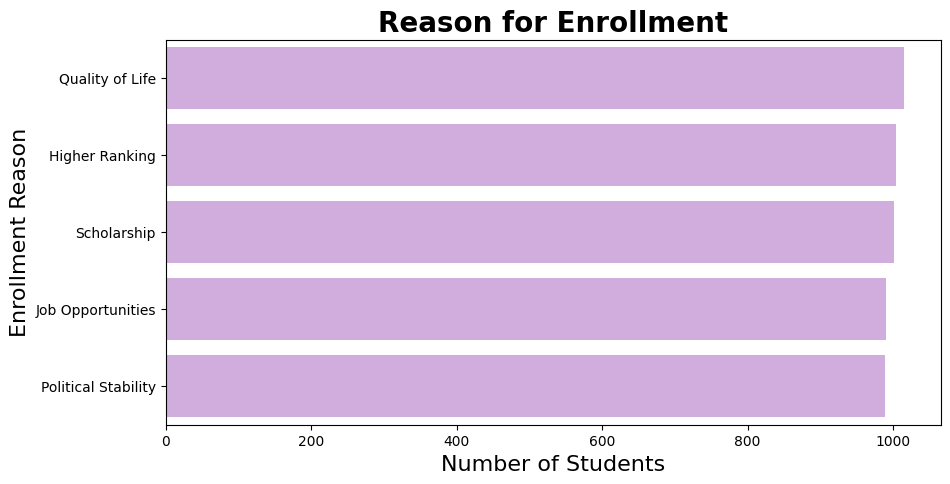

In [27]:
# Reason for enrollment

plt.figure(figsize=(10,5))

top_reason = df['enrollment_reason'].value_counts().head(15)
sns.barplot(x=top_reason.values, y=top_reason.index, color=custom_cmap[5])
plt.title('Reason for Enrollment', fontsize=20, fontweight='bold')
plt.xlabel('Number of Students', fontsize=16)
plt.ylabel('Enrollment Reason', fontsize=16)
plt.show()


VISA STATUS COUNT

In [28]:
# Visa status count

plt.figure(figsize=(10,5))

status_of_visa = df['visa_status'].value_counts()
sns.countplot(x = status_of_visa.index, data = df, color=custom_cmap[4])
plt.title('Visa type held by students', fontsize=20, fontweight='bold')
plt.ylabel('Visa Status', fontsize=16)
plt.xlabel('Number of students', fontsize=14)
plt.show()


ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 5000 and the vector passed to `x` has length 6.

<Figure size 1000x500 with 0 Axes>

# LANGUAGE TEST AND EXAMS INSIGHTS

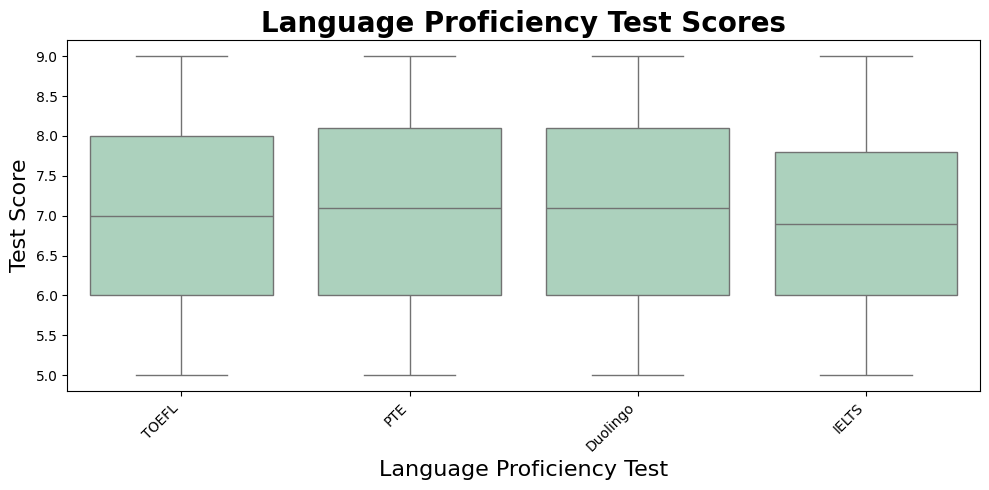

In [29]:
# Language test insights

df = df.copy()
df.columns = df.columns.str.strip()
df['test_score'] = pd.to_numeric(df['test_score'], errors='coerce')

plt.figure(figsize=(10,5))

sns.boxplot(
    data=df[df['test_score'] > 0],
    x='language_proficiency_test',
    y='test_score',
    color=custom_cmap[3]
)

plt.title('Language Proficiency Test Scores', fontsize=20, fontweight='bold')
plt.xlabel('Language Proficiency Test', fontsize=16)
plt.ylabel('Test Score', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


DISTRIBUTION OF GPA

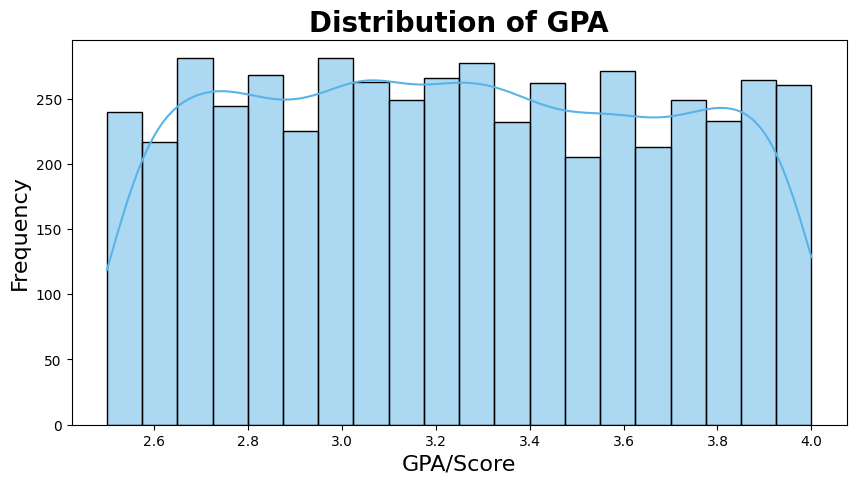

In [30]:
# Distribution of GPA

plt.figure(figsize=(10,5))

sns.histplot(df['gpa_or_score'], bins=20, kde=True, color=custom_cmap[2])
plt.title('Distribution of GPA', fontsize=20, fontweight='bold')
plt.xlabel('GPA/Score', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()


## SALARY ANALYSIS FOR PLACED STUDENTS

PLACEMENT SUCCESS OVERVIEW

In [31]:
# Comprehensive economic and salary analysis
print(" COMPREHENSIVE ECONOMIC AND SALARY ANALYSIS")
print("="*60)

# Placement success overview
print(f"\n PLACEMENT SUCCESS OVERVIEW")
print("_"*40)
placement_stats = df['placement_status'].value_counts()
placement_rate = (placement_stats['Placed'] / len(df)) * 100
print(f" Total Students: {len(df)}")
print(f" Successfully Placed Students: {placement_stats['Placed']:,} ({placement_rate:.2f}%)")
print(f" Students Who Were Not Placed: {placement_stats['Not Placed']:,} ({100 - placement_rate:.2f}%)")



 COMPREHENSIVE ECONOMIC AND SALARY ANALYSIS

 PLACEMENT SUCCESS OVERVIEW
________________________________________
 Total Students: 5000
 Successfully Placed Students: 2,509 (50.18%)
 Students Who Were Not Placed: 2,491 (49.82%)


SALARY ANALYSIS FOR PLACED STUDENTS

In [32]:
# Salary analysis for placed students

placed_students = df[df['placement_status'] == 'Placed']
print (f"\n SALARY ANALYSIS FOR PLACED STUDENTS")
print("_"*40)
print (f"Number of Placed Students: {len(placed_students):,}")
print(f" Average Starting Salary for Placed Students: ${placed_students['starting_salary_usd'].mean():,.0f}")
print(f" Median Starting Salary for Placed Students: ${placed_students['starting_salary_usd'].median():,.0f}")
print(f" Highest Salary for Placed Students: ${placed_students['starting_salary_usd'].max():,.0f}")
print(f" Lowest Salary for Placed Students: ${placed_students['starting_salary_usd'].min():,.0f}")
print(f" Range of Salaries for Placed Students: ${placed_students['starting_salary_usd'].max() - placed_students['starting_salary_usd'].min():,.0f}")
print(f" Standard Deviation of Salaries for Placed Students: ${placed_students['starting_salary_usd'].std():,.0f}")




 SALARY ANALYSIS FOR PLACED STUDENTS
________________________________________
Number of Placed Students: 2,509
 Average Starting Salary for Placed Students: $88,785
 Median Starting Salary for Placed Students: $87,777
 Highest Salary for Placed Students: $149,932
 Lowest Salary for Placed Students: $30,276
 Range of Salaries for Placed Students: $119,656
 Standard Deviation of Salaries for Placed Students: $34,621


SALARY BY DESTINATION COUNTRY

In [33]:
# Salary by destination country

print (f"\n SALARY BY DESTINATION COUNTRY")
print("_"*40)
salary_by_country = placed_students.groupby('destination_country')['starting_salary_usd'].mean().sort_values(ascending=False)
print("Top paying destination countries (min 15 students)")
print(salary_by_country.head(15))




 SALARY BY DESTINATION COUNTRY
________________________________________
Top paying destination countries (min 15 students)
destination_country
USA             92775.460251
Ireland         90760.754098
Finland         90555.716102
UK              90057.022059
Russia          89426.418251
South Africa    88818.207048
Germany         87821.224490
Canada          86882.739130
UAE             86745.419847
India           84594.488806
Name: starting_salary_usd, dtype: float64


SALARY BY FIELD OF STUDY

In [34]:
# Salary by field of study

print (f"\n SALARY BY FIELD OF STUDY")
print("_"*40)
salary_by_field = placed_students.groupby('field_of_study')['starting_salary_usd'].agg(['mean', 'median', 'count']).round(0)
salary_by_field = salary_by_field.sort_values(by='mean', ascending=False)
print("Average salary by field of study")
print(salary_by_field.head)




 SALARY BY FIELD OF STUDY
________________________________________
Average salary by field of study
<bound method NDFrame.head of                      mean   median  count
field_of_study                           
Medicine          92318.0  90400.0    274
Business          91072.0  91214.0    306
Law               90967.0  90534.0    319
Social Sciences   88660.0  86647.0    333
Engineering       87802.0  88370.0    348
Computer Science  87459.0  83606.0    310
Arts              87278.0  84500.0    305
Natural Sciences  85255.0  80912.0    314>


SCHOLARSHIP IMPACT ANALYSIS

In [37]:
# Scholarship impact analysis

print(f"SCHOLARSHIP IMPACT ANALYSIS")
print("_"* 40)

scholarship_analysis = df.groupby('scholarship_recieved').agg({
    'placement_status' : lambda x: (x == 'Placed').mean() * 100,
    'starting_salary_usd' : lambda x: x[x > 0].mean() if len(x[x > 0]) > 0 else 0
}).round(2)

scholarship_analysis.columns = ['Placement_Rate_%', 'Aveg_Salary']
print("Impact of Scholarships:")
print (scholarship_analysis)

SCHOLARSHIP IMPACT ANALYSIS
________________________________________


KeyError: 'scholarship_recieved'

INITIAL SALARY BY COUNTRY FOR PLACED STUDENTS

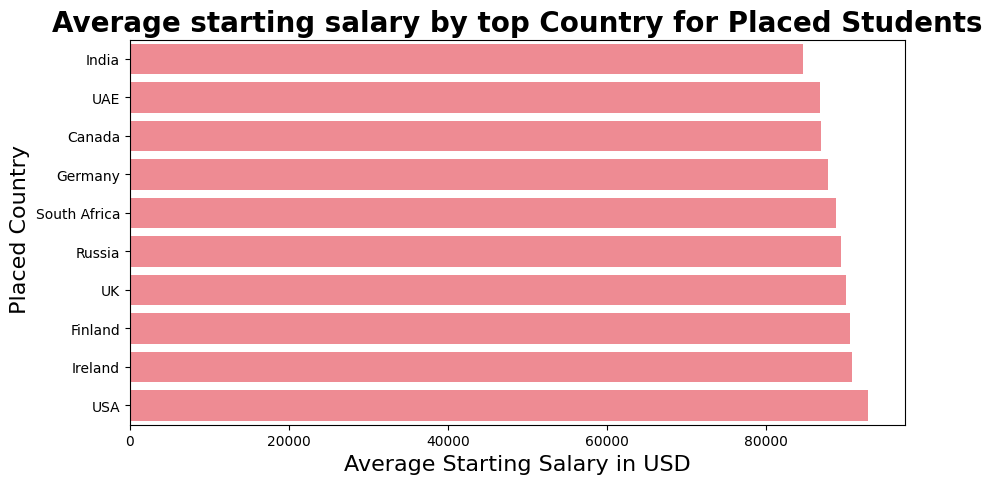

In [38]:
#Initial salary by the country for placed students

placed_df = df[df['placement_status'] == 'Placed']
salary_by_country = placed_df.groupby('placement_country')['starting_salary_usd'].mean().sort_values(ascending=True).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=salary_by_country.values, y=salary_by_country.index, color=custom_cmap[0])
plt.title('Average starting salary by top Country for Placed Students', fontsize=20, fontweight='bold')
plt.xlabel('Average Starting Salary in USD', fontsize=16)
plt.ylabel(' Placed Country', fontsize=16)
plt.show()
